num_qubits 12
iterations 14
{   'assignment': '010010100001',
    'circuit_results': [   {   '001001010100': 0.076171875,
                               '001001100010': 0.0732421875,
                               '001010100010': 0.0849609375,
                               '001100010100': 0.0869140625,
                               '010001100001': 0.087890625,
                               '010010001100': 0.0703125,
                               '010010100001': 0.09765625,
                               '010100001100': 0.0859375,
                               '100001010001': 0.091796875,
                               '100010001010': 0.0908203125,
                               '100100001010': 0.0732421875,
                               '100100010001': 0.0810546875}],
    'iterations': [14],
    'max_probability': 0.09765625,
    'oracle_evaluation': True,
    'top_measurement': '010010100001'}
{'010010001100': 0.0703125, '001100010100': 0.0869140625, '001001010100': 0.076171875,

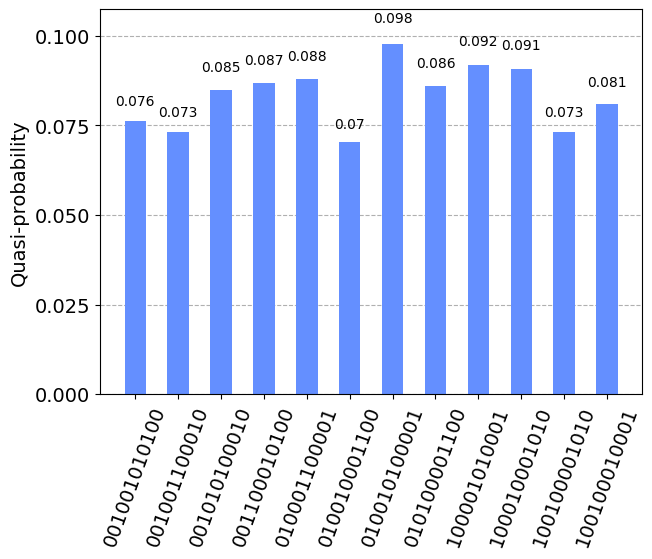

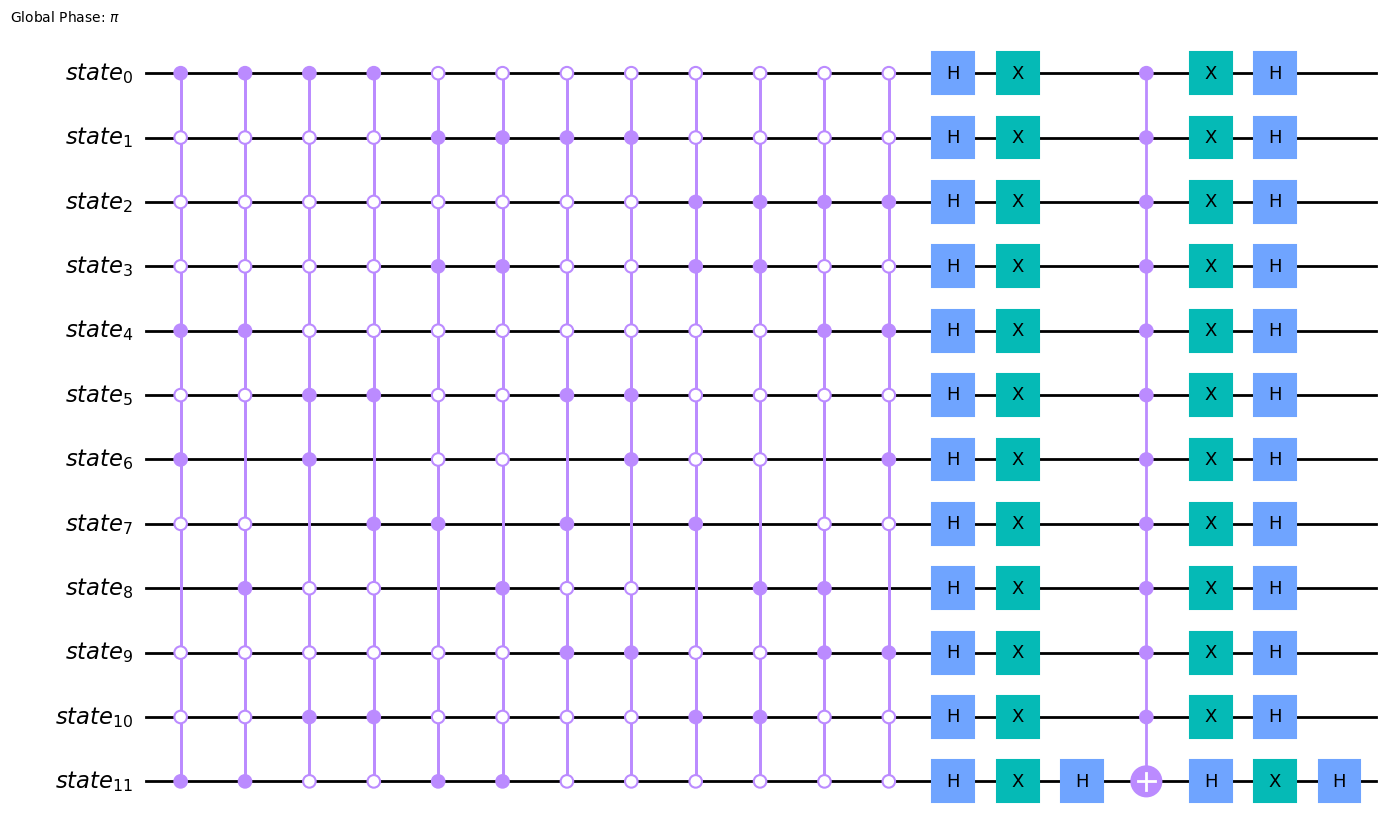

depth 19
width 12
max_mem 321.39453125 MiB
total_time 2.147916316986084
avg_time 2.147916316986084
std 0.8173143863677979
iter_times [1.3306019306182861]
times [(0.0635981559753418, 1.1148886680603027, 0.1521143913269043, 1.3306019306182861)]


In [2]:
from qiskit_algorithms import AmplificationProblem, Grover
from qiskit.circuit.library import PhaseOracle
from qiskit.primitives import BackendSampler
from qiskit.tools.visualization import plot_histogram
# from qiskit_ibm_runtime import Sampler, Options
from qiskit import IBMQ, Aer
from qiskit.visualization import array_to_latex
from qiskit import QuantumCircuit
import time, math
from memory_profiler import memory_usage
from qiskit_aer.primitives.sampler import Sampler

count = 1
times = []
iter_times = []
epoch_time = time.time()

def main():
    for i in range(count):
        start_time = time.time()

        # IBMQ.load_account()

        oracle = PhaseOracle.from_dimacs_file('data/grafo_regiões_amazonas.cnf')
        # oracle = PhaseOracle.from_dimacs_file('data/graphE.cnf')
        problem = AmplificationProblem(oracle)
        print("num_qubits", problem.grover_operator.num_qubits)
        sampler = Sampler()
        iterations = Grover.optimal_num_iterations(num_solutions=12, num_qubits=oracle.num_qubits) 
        # iterations = 7
        print("iterations", iterations)
        grover = Grover(iterations=iterations, sampler=sampler)
        circuit_time = time.time() - start_time
        result = grover.amplify(problem)
        result_time = time.time() - start_time - circuit_time

        # oracle = QuantumCircuit(2)
        # oracle.cz(0, 1, ctrl_state=0)
        # oracle.draw(output='text')

        # print(result.oracle_evaluation, result.top_measurement)
        print(result)
        print(result.circuit_results[0])
        # plot_histogram(result.circuit_results[0], figsize=(60,40))
        display(plot_histogram(result.circuit_results[0]))
        plot_time = time.time() - start_time - circuit_time - result_time
        iteration_time = time.time() - start_time
        times.append((circuit_time, result_time, plot_time, iteration_time))
        iter_times.append(iteration_time)

        # problem.oracle.decompose().draw(output='mpl')
        display(problem.grover_operator.decompose().draw(output='mpl'))
        print("depth", problem.grover_operator.decompose().depth())
        print("width", problem.grover_operator.decompose().width())
        # problem.grover_operator.decompose().qasm(formatted=True)
        # grover.construct_circuit(problem=problem).decompose(reps=2).draw(output='mpl')


        # array = []
        # array.append(('100010001', result.circuit_results[0]['100010001']))
        # array.append(('010001100', result.circuit_results[0]['010001100']))
        # array.append(('100001010', result.circuit_results[0]['100001010']))
        # array.append(('010100001', result.circuit_results[0]['010100001']))
        # array.append(('001100010', result.circuit_results[0]['001100010']))
        # array.append(('001010100', result.circuit_results[0]['001010100']))

        # print(array)
        # result_array = [round(x[1], 4) for x in array]
        # print(result_array)
        #array_to_latex(result_array, prefix="\\text{Statevector} = ", max_size=32)

max_mem = memory_usage(proc=main, interval=1, max_usage=True)
print("max_mem", max_mem, "MiB")

total_time = time.time() - epoch_time
avg_time = total_time / count
print("total_time", total_time)
print("avg_time", avg_time)

var = sum((i - avg_time) ** 2 for i in iter_times) / len(iter_times)
std = math.sqrt(var)
print("std", std)

print("iter_times", iter_times)
print("times", times)

